# **Linear Regression**: Human Brain Weight 🧠

This dataset was compiled using a medical study conducted on a group of people. This dataset shows a few variations of head sizes and masses of brains, it also consists additional gender and age group columns. The goal of the study is to predict the masses of the brains using the data, and later compare it with the actual masses of brains mentioned in the dataset.

# **Linear Regression with Statsmodels**

$\qquad$ <span style="color:gray"><b>0.</b> Settings </span><br>
$\qquad$ <span style="color:gray"><b>1.</b> Dataset </span><br>
$\qquad$ <span style="color:gray"><b>2.</b> Data Preprocessing </span><br>
$\qquad$ <span style="color:gray"><b>3.</b> Data Preparation </span><br>
$\qquad\qquad$ <span style="color:gray"><b>3.1.</b> One-Hot-Encoding </span><br>
$\qquad\qquad$ <span style="color:gray"><b>3.2.</b> Ordinal-Encoding </span><br>
$\qquad\qquad$ <span style="color:gray"><b>3.3.</b> Update </span><br>
$\qquad\qquad$ <span style="color:gray"><b>3.4.</b> Split in train and validation </span><br>
$\qquad$ <span style="color:gray"><b>4.</b> Linear Regression with Statsmodels </span><br>
$\qquad\qquad$ <span style="color:gray"><b>4.1.</b> Basic </span><br>
$\qquad\qquad$ <span style="color:gray"><b>4.2.</b> Advanced </span><br>
$\qquad\qquad$ <span style="color:gray"><b>4.3.</b> Fancy </span><br>
$\qquad\qquad$ <span style="color:gray"><b>4.4.</b> GLM </span><br>

## **0.** Settings

In [43]:
# Libraries
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.formula.api import glm
from statsmodels.formula.api import ols

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd  
import numpy as np

np.random.seed(42)
%matplotlib inline

## **1.** Dataset

In [ ]:
'''
    DATASET INFORMATIONS

    |--------------|------------|-------|--------------------------------------------------------------|
    | Name         | Data Type  | Meas. | Description                                                  |
    |--------------|------------|-------|--------------------------------------------------------------|
    | Gender       | nominal    |       | 1 represents Male , 2 represents Female                      |
    | Age Range    | nominal    |       | 1 represents >18 years of age, 2 represents <18 years of age |
    | Head Size    | continuous | cm^3  | Head volume                                                  |
    | Brain Weight | continuous | grams | Mass of brains                                               |
    |--------------|------------|-------|--------------------------------------------------------------|  

'''

In [11]:
# Import the dataset
data = pd.read_csv('./dataset.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [12]:
data.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [13]:
data.columns = ['Gender', 'Age Range', 'Head Size', 'Brain Weight']
data.columns

Index(['Gender', 'Age Range', 'Head Size', 'Brain Weight'], dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Gender        237 non-null    int64
 1   Age Range     237 non-null    int64
 2   Head Size     237 non-null    int64
 3   Brain Weight  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


## **2.** Data Preprocessing

In [15]:
# Null elements
data.isnull().sum()

Gender          0
Age Range       0
Head Size       0
Brain Weight    0
dtype: int64

There are no missing values in this dataset.

## **3.** Data Preparation

In [16]:
X = data[['Gender', 'Age Range', 'Head Size']]
Y = data['Brain Weight']

In [17]:
X.dtypes

Gender       int64
Age Range    int64
Head Size    int64
dtype: object

This is not good, the 'Age Range' and the 'Gender' are not numbers that should be considered as numbers, they are categories and should therefore be dummies-converted. Actually to 'Age Range' we can apply an Ordinal-Encoding (since it makes sense to give growth meaning), while to 'Gender' we apply a One-Hot-Encoder.

### **3.1.** One-Hot-Encoding

In [18]:
## ONE-HOT-ENCODING: 'Gender'

# Encoding
gender_encoded = OneHotEncoder().fit_transform(X[['Gender']]);

# Transform in a DataFrame
gender_encoded = pd.DataFrame(gender_encoded.toarray()).astype(int)

# Show results
gender_encoded.head()

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [19]:
# What is the association?
X['Gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [20]:
# It is possible to conclude:
#   1 -> Male   -> [1, 0]
#   2 -> Female -> [0, 1]

gender_encoded.columns = ['Male', 'Female']
gender_encoded

,Male,Female
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
232,0,1
233,0,1
234,0,1
235,0,1


### **3.2.** Ordinal-Encoding

In [21]:
## ORDINAL-ENCODING: 'Age Range' 

# Encoding
age_encoded = OrdinalEncoder().fit_transform(X[['Age Range']]);

# Transform in a DataFrame
age_encoded = pd.DataFrame(age_encoded).astype(int)

# Show results
age_encoded.head()

,0
0,0
1,0
2,0
3,0
4,0


In [22]:
# Perform a replacement to have: 0 == <18, 1 == >18
age_encoded = age_encoded.replace({0:1, 1:0})
age_encoded.head()

,0
0,1
1,1
2,1
3,1
4,1


In [23]:
# What is the association?
X['Age Range'].head()

0    1
1    1
2    1
3    1
4    1
Name: Age Range, dtype: int64

In [ ]:
# It is possible to conclude:
#   1 -> >18 -> 1
#   2 -> <18 -> 0

### **3.3.** Update

In [24]:
# Add 'Gender' encoded
X = pd.concat([X, gender_encoded], axis=1)

# Drop the old 'Gender'  
X = X.drop('Gender', axis=1) 

# Substitute 'Age Range' with 'age_encoded'
X['Age Range'] = age_encoded

# Check
X

,Age Range,Head Size,Male,Female
0,1,4512,1,0
1,1,3738,1,0
2,1,4261,1,0
3,1,3777,1,0
4,1,4177,1,0
...,...,...,...,...
232,0,3214,0,1
233,0,3394,0,1
234,0,3233,0,1
235,0,3352,0,1


### **3.4.** Split in train and validation

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(189, 4)
(48, 4)
(189,)
(48,)


## **4.** Linear Regression with **Statsmodels**

### **4.1.** Basic

In [26]:
# In statsmodel we have to manually add the intercept
X_with_intercept = sm.add_constant(X)
X_with_intercept.head()

,const,Age Range,Head Size,Male,Female
0,1.0,1,4512,1,0
1,1.0,1,3738,1,0
2,1.0,1,4261,1,0
3,1.0,1,3777,1,0
4,1.0,1,4177,1,0


In [28]:
# Divide in train and test (the new dataset, with intercept)
X_train, X_test, Y_train, Y_test = train_test_split(X_with_intercept, Y, test_size = 0.2, random_state=5)

In [29]:
# Fit regression model
model = sm.OLS(Y, X_with_intercept)
model = model.fit();

In [30]:
# Inspect the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Brain Weight   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     146.0
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           2.94e-53
Time:                        18:54:45   Log-Likelihood:                -1345.7
No. Observations:                 237   AIC:                             2699.
Df Residuals:                     233   BIC:                             2713.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        255.2074     35.975      7.094      0.0

In [31]:
print('Parameters:')
print('--------------------------')
print(model.params)
print('\nR2:')
print('--------------------------')
print(model.rsquared)

Parameters:
--------------------------
const        255.207360
Age Range     23.968445
Head Size      0.244212
Male         138.875307
Female       116.332053
dtype: float64

R2:
--------------------------
0.6528346387526656


In [33]:
# Evaluation
Y_pred_train = model.predict(X_train)

# Metrics
r2   = r2_score(Y_train, Y_pred_train)
mae  = mean_absolute_error(Y_train, Y_pred_train)
mse  = mean_squared_error(Y_train, Y_pred_train)
rmse = np.sqrt(mse)

print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error: {rmse}')

R2 Score: 0.6119769433954168
Mean Absolute Error: 57.41370465780287
Mean Square Error: 5433.661065204953
Root Mean Square Error: 73.71337100692759


### **4.2.** Advanced

In [37]:
data_advanced = pd.concat([X_train, Y_train], axis=1, join="inner")
data_advanced.columns = ['const', 'age_range', 'head_size', 'male', 'female', 'brain_weight']
data_advanced

,const,age_range,head_size,male,female,brain_weight
34,1.0,1,4158,1,0,1432
174,1.0,1,3615,0,1,1350
55,1.0,1,3458,1,0,1225
198,1.0,0,3493,0,1,1240
217,1.0,0,3170,0,1,1178
...,...,...,...,...,...,...
118,1.0,0,4114,1,0,1362
230,1.0,0,3685,0,1,1350
189,1.0,0,3703,0,1,1350
206,1.0,0,3402,0,1,1220


In [39]:
# Fit regression model
results = smf.ols('brain_weight ~ const + age_range + head_size + male + female + brain_weight', data=data_advanced).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           brain_weight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.184e+29
Date:                Thu, 16 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:58:07   Log-Likelihood:                 4950.2
No. Observations:                 189   AIC:                            -9890.
Df Residuals:                     184   BIC:                            -9874.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.224e-13   3.87e-13     -0.575   

In [41]:
# Influence test:
#       once created, an object of class OLSInfluence holds attributes and methods 
#       that allow users to assess the influence of each observation. 
#       For example, we can compute and extract the first few rows of DFbetas by:

test_class = OLSInfluence(results)
test_class.dfbetas[:5, :]

array([[ 0.17081575,  0.28949481, -0.40392374, -1.76000874, -0.4298968 ,
         1.29561558,  1.62414217],
       [-1.80547454,  0.07133669,  1.79590552,  2.1731347 ,  0.1571729 ,
        -2.57656716,  0.30772795],
       [-0.74447704, -0.0994916 ,  0.74053131,  0.89607959, -0.53502283,
        -0.66887857, -0.88822894],
       [-1.60307423, -1.22349671,  0.1161628 ,  1.08563457, -1.09475496,
        -2.17832207,  0.31930361],
       [-1.89119075,  1.61537366, -3.64550613, -0.70950834,  1.67638495,
        -3.76176773,  2.85450996]])

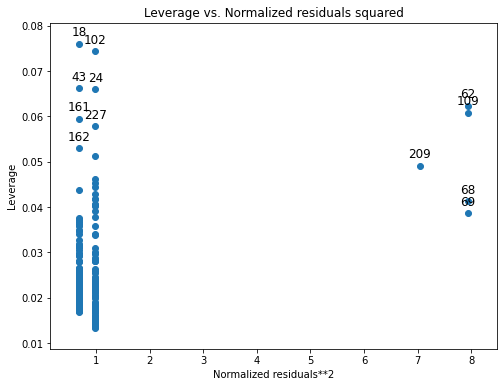

In [42]:
# Useful information on leverage can also be plotted:

fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(results, ax=ax)

### **4.3.** Fancy

In [59]:
data_fancy = {
    'x1': X_train['Head Size'],
    'x2': X_train['Male'],
    'x3': X_train['Female'],
    'x4': X_train['Age Range'],
    'y': Y_train}

# Fit any form of regression model
results = ols('y ~ x1 + np.sin(x1) + I(x1-5) + x2 + x3 + np.exp(x4)', data=data_fancy).fit()

In [60]:
# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     73.23
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           5.07e-37
Time:                        19:03:52   Log-Likelihood:                -1080.4
No. Observations:                 189   AIC:                             2171.
Df Residuals:                     184   BIC:                             2187.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.0967      4.521      5.994      0.0

### **4.4.** GLM

In [62]:
data_glm = pd.concat([X_train, Y_train], axis=1, join="inner")
data_glm.columns = ['const', 'age_range', 'head_size', 'male', 'female', 'brain_weight']
data_glm

,const,age_range,head_size,male,female,brain_weight
34,1.0,1,4158,1,0,1432
174,1.0,1,3615,0,1,1350
55,1.0,1,3458,1,0,1225
198,1.0,0,3493,0,1,1240
217,1.0,0,3170,0,1,1178
...,...,...,...,...,...,...
118,1.0,0,4114,1,0,1362
230,1.0,0,3685,0,1,1350
189,1.0,0,3703,0,1,1350
206,1.0,0,3402,0,1,1220


In [64]:
# Formula-based
formula = 'brain_weight ~ head_size + male + female + age_range'
model = glm(formula=formula, data=data_glm, family=sm.families.Gaussian()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           brain_weight   No. Observations:                  189
Model:                            GLM   Df Residuals:                      185
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                          5520.6
Method:                          IRLS   Log-Likelihood:                -1080.4
Date:                Thu, 16 Jun 2022   Deviance:                   1.0213e+06
Time:                        19:04:48   Pearson chi2:                 1.02e+06
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7894
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    262.0164     42.121      6.221      0.0